# Google PlayStore EDA Analysis
## Introduction
This project is a part of the Data Science and Business Analytics course at IIIT-B. The objective of this project is to perform Exploratory Data Analysis on the Google PlayStore dataset and answer the following questions:
1. What are the most popular categories in the Google PlayStore?
2. BLah Blah blah!!!

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Loading and Exploration | Cleaning

- Loading Files

In [3]:
df = pd.read_csv('googleplaystore.csv')

- An insight on top 5 rows

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


- An important point

In [8]:
# set options to be max for columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# hiding all warnings to keeps things tidy
import warnings
warnings.filterwarnings('ignore')

In [15]:
# A look at columns
print(f"The names of columns in this dataset are: {df.columns}.")

The names of columns in this dataset are: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object').


In [14]:
# row vs columns
print(f"The number of rows in this dataset are {df.shape[0]} and the number of columns are {df.shape[1]}.")

The number of rows in this dataset are 10841 and the number of columns are 13.


- Overall info of dataset

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


- Let's check how many numeric columns/variables present

In [17]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


In [18]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


- **Observation about Dataset:**\
Only 2 variables shown in describe screen as numeric but in dataset we noticed there are more than two numeric variables.

- To make `Size` a numeric column

In [21]:
df['Size'].nunique()

461

---
- Three types of values observed
  - "Varies with device"
  - M
  - k
---

In [23]:
# checking for missing value
df['Size'].isnull().sum()

np.int64(0)

- No missing value so good to go!

To verify that 3 types of values are contained in `Size`

In [24]:
# checking for "M" in column
df['Size'].str.contains("M").sum()

np.int64(8830)

In [25]:
# checking for "k" in column
df['Size'].str.contains("k").sum()

np.int64(316)

In [26]:
# checking for "Varies with device" in column
df['Size'].str.contains("Varies with device").sum()

np.int64(1695)

In [29]:
# final verifiation that all datapoints have been taken into account
1695+316+8830 == len(df['Size'])

True

In [35]:
# convert size column into bytes(b)
# let's define a function
def convert_size(size):
    if 'k' in size:
        return float(size.replace('k', '')) * 1024
    elif 'M' in size:
        return float(size.replace('M', '')) * 1024 * 1024
    elif 'Varies with device' in size:
        return np.nan
    return size

In [39]:
# apply the function
df['Size'] = convert_size(df['Size'])
df['Size']

0         19922944.0
1         14680064.0
2          9122611.2
3         26214400.0
4          2936012.8
5          5872025.6
6         19922944.0
7         30408704.0
8         34603008.0
9          3250585.6
10        29360128.0
11        12582912.0
12        20971520.0
13        22020096.0
14        38797312.0
15         2831155.2
16         5767168.0
17        17825792.0
18        40894464.0
19        32505856.0
20        14680064.0
21        12582912.0
22         4404019.2
23         7340032.0
24        24117248.0
25         6291456.0
26        26214400.0
27         6396313.6
28         4823449.6
29         4404019.2
30         9646899.2
31         5452595.2
32        11534336.0
33        11534336.0
34         4404019.2
35         9646899.2
36        25165824.0
37               NaN
38        11534336.0
39         9856614.4
40        15728640.0
41        10485760.0
42               NaN
43         1258291.2
44        12582912.0
45        25165824.0
46        27262976.0
47         83

In [41]:
# A look into data set
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [42]:
# renaming size column
df.rename(columns={'Size':'Size_in_bytes'}, inplace=True)

In [43]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [44]:
# Conversion of bytes into Mb
df['Size_in_MB']=df['Size_in_bytes'].apply(lambda x: x/(1024*1024))

In [45]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


## Installs column
- Since `Size` has been taken care of now it's time for `Installs` column.

In [48]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [49]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

- Checking for **missing values** if any!

In [50]:
df['Installs'].isnull().sum()

np.int64(0)

Now only problem remains is to remove `+` sign from column to make it numerical.
Steps to do so:
1. Remove `+` sign
2. Remove `,` sign
3. Convert into `int` as values are discrete

In [51]:
# removal of '+' sign
df['Installs']=df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)

In [52]:
df['Installs'].value_counts()

Installs
1,000,000        1579
10,000,000       1252
100,000          1169
10,000           1054
1,000             908
5,000,000         752
100               719
500,000           539
50,000            479
5,000             477
100,000,000       409
10                386
500               330
50,000,000        289
50                205
5                  82
500,000,000        72
1                  67
1,000,000,000      58
0                  15
Name: count, dtype: int64

In [53]:
# removal of "," sign
df['Installs']=df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)

In [54]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [55]:
# conversion into integer type
df['Installs']=df['Installs'].apply(lambda x: int(x))

In [56]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

- Let's have a look how many numerical columns now!

In [57]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Size_in_MB
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,100.000000


## Price Column

In [58]:
df['Price'].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$3.49          7
$7.99          7
$24.99         7
$5.49          6
$19.99         6
$6.49          5
$8.99          5
$12.99         5
$11.99         5
$10.00         3
$1.00          3
$16.99         3
$2.00          3
$17.99         2
$10.99         2
$9.00          2
$79.99         2
$7.49          2
$3.95          2
$33.99         2
$1.70          2
$13.99         2
$8.49          2
$39.99         2
$1.50          1
$25.99         1
$74.99         1
$15.99         1
$3.88          1
$1.76          1
$3.02          1
$400.00        1
$4.84          1
$2.50          1
$1.59          1
$1.61          1
$4.77          1
$5.00          1
$1.29          1
$379.99        1
$299.99        1
$37.99         1
$18.99         1
$389.99 

**Steps to make it numerical:**\
1. Remove `$` sign
2. Typecasting to `float` type

In [59]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)

In [60]:
df['Price'].value_counts()

Price
0         10041
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
3.49          7
7.99          7
24.99         7
5.49          6
19.99         6
6.49          5
8.99          5
12.99         5
11.99         5
10.00         3
1.00          3
16.99         3
2.00          3
17.99         2
10.99         2
9.00          2
79.99         2
7.49          2
3.95          2
33.99         2
1.70          2
13.99         2
8.49          2
39.99         2
1.50          1
25.99         1
74.99         1
15.99         1
3.88          1
1.76          1
3.02          1
400.00        1
4.84          1
2.50          1
1.59          1
1.61          1
4.77          1
5.00          1
1.29          1
379.99        1
299.99        1
37.99         1
18.99         1
389.99        1
19.90         1
1.75          1
14.00         1
4.

In [62]:
# type casting using lambda function
df['Price'] = df['Price'].apply(lambda x: float(x))

In [63]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_MB
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


## Moving further with EDA

In [65]:
# using f string to print min, max and average of price
print(f'Min price is {df["Price"].min()}')
print(f'Max price is {df["Price"].max()}')
print(f'Average price is {df["Price"].mean()}')

Min price is 0.0
Max price is 400.0
Average price is 1.0272733142699015


## MISSING VALUES
- Let's deal with missing values if any!

In [68]:
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes     1695
Size_in_MB        1695
Rating            1474
Current Ver          8
Android Ver          2
Category             1
Genres               1
Type                 1
App                  0
Reviews              0
Installs             0
Price                0
Content Rating       0
Last Updated         0
dtype: int64

In [71]:
# finding missing values percentage in DataFrame
missing = round(df.isnull().sum() * 100 / len(df), 2)
missing.sort_values(ascending=False)

Size_in_bytes     15.64
Size_in_MB        15.64
Rating            13.60
Current Ver        0.07
Android Ver        0.02
Category           0.01
Genres             0.01
Type               0.01
App                0.00
Reviews            0.00
Installs           0.00
Price              0.00
Content Rating     0.00
Last Updated       0.00
dtype: float64

In [74]:
# find total number of missing values
df.isnull().sum().sum()

np.int64(4877)

<Axes: >

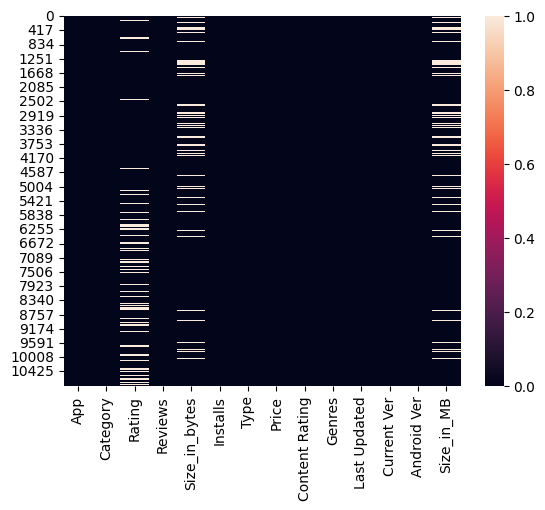

In [79]:
# plot mising values
sns.heatmap(df.isnull())

Text(0, 0.5, 'Percentage')

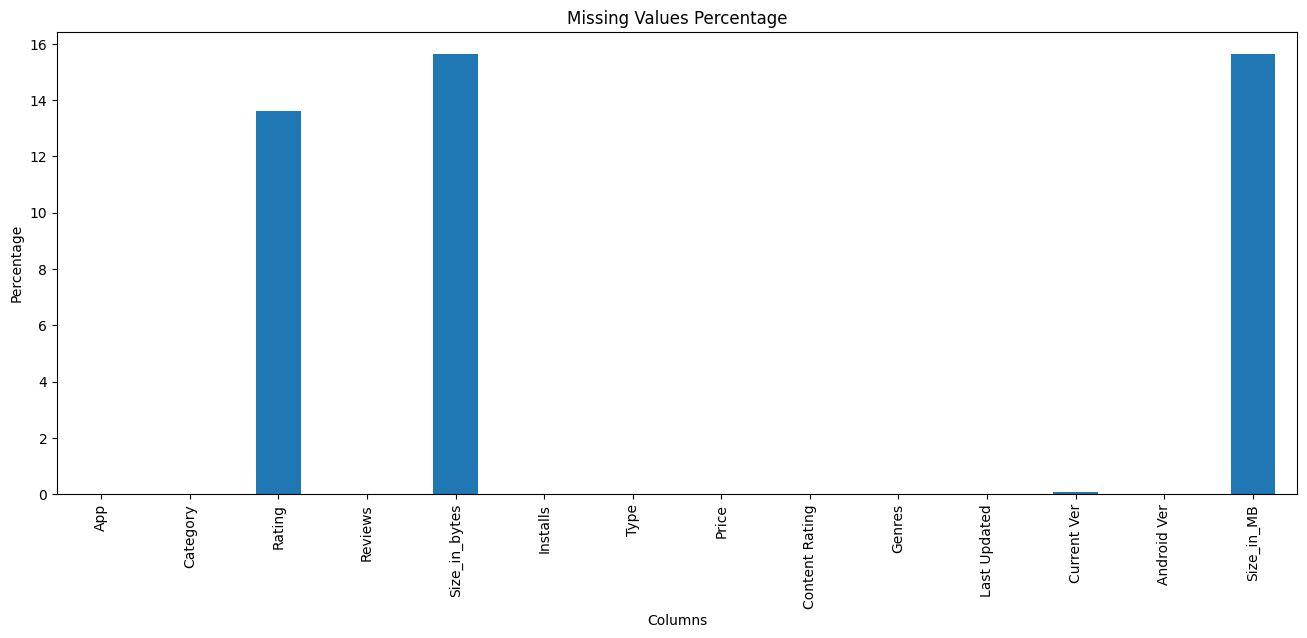

In [84]:
#  plot based on missing values percentage
# set figure size
plt.figure(figsize=(16, 6))
# plot the null values by their percentage in each column
missing_percentage= df.isnull().sum()*100/len(df)
missing_percentage.plot(kind='bar')
# set the title
plt.title('Missing Values Percentage')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')

<Axes: >

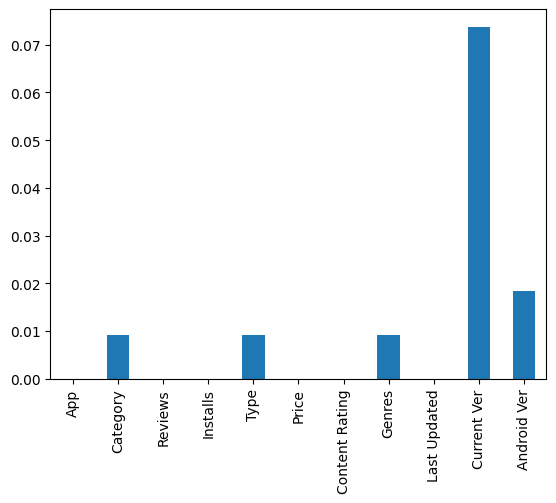

In [85]:
# to plot those with less than 1 percent
missing_percentage[missing_percentage<1].plot(kind='bar')